# Oversampling Method

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('creditcard.csv')

In [25]:
df = df.drop_duplicates()

In [26]:
print(df.duplicated().sum())

0


In [27]:
df.drop('Time', axis=1, inplace=True)

In [28]:
print(df['Class'].value_counts())

0    283253
1       473
Name: Class, dtype: int64


In [29]:
X = df.drop('Class', axis=1)
y = df['Class']
X.shape,y.shape

((283726, 29), (283726,))

# Splitting the dataset

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
y_train.value_counts()

0    226597
1       383
Name: Class, dtype: int64

In [33]:
y_test.value_counts()

0    56656
1       90
Name: Class, dtype: int64

In [12]:
from sklearn.utils import resample

#creating two dataframes for majority and minority class
df_majority = df[df['Class']== 0]
df_minority = df[df['Class'] == 1]

#upsample minority class
df_minority_oversampled = resample(df_minority, replace =True,n_samples =283253, random_state=42)

#Combining majority class with the upsamples minority class
df_oversampled =pd.concat([df_minority_oversampled, df_majority])

In [34]:
from sklearn.utils import resample

#creating two dataframes for majority and minority class
X_train_minority =X_train[y_train==1]
y_train_minority =y_train[y_train==1]
X_train_majority =X_train[y_train==0]
y_train_majority =y_train[y_train==0]



#oversampling the minority class to match the majority(non-fraud) class
X_train_minority_oversampled = resample(X_train_minority, replace =True,n_samples =226597, random_state=42)
y_train_minority_oversampled = resample(y_train_minority, replace =True,n_samples =226597, random_state=42)




In [35]:
X_train_oversampled =pd.concat([X_train_majority,X_train_minority_oversampled])
y_train_oversampled =pd.concat([y_train_majority,y_train_minority_oversampled])

# Training the Random Forest Model


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
print('Model fitting')

#Initializing the model
rf  = RandomForestClassifier()

# Training the model
rf.fit(X_train_oversampled, y_train_oversampled)
print('Model fitted successfully')

Model fitting
Model fitted successfully


# Model Evaluation

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [16]:
# Training prediction
y_pred = rf.predict(X_train_oversampled)

#Classification Matrix
print(classification_report(y_train_oversampled, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226597
           1       1.00      1.00      1.00    226597

    accuracy                           1.00    453194
   macro avg       1.00      1.00      1.00    453194
weighted avg       1.00      1.00      1.00    453194



In [39]:
# Testing Prediction
y_preds = rf.predict(X_test)

In [41]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.96      0.74      0.84        90

    accuracy                           1.00     56746
   macro avg       0.98      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746



In [18]:
#Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_preds)

[Text(0.5, 14.722222222222216, 'Predicted Label'),
 Text(45.722222222222214, 0.5, 'Actual Label')]

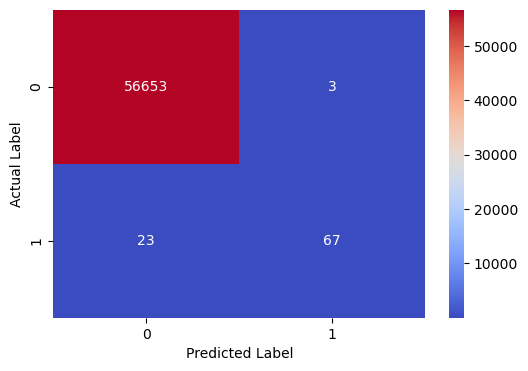

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix,cmap='coolwarm',annot =True, fmt ='g')
ax.set(xlabel ="Predicted Label",ylabel ="Actual Label")

In [20]:
y_proba = rf.predict_proba(X_test)[:, 1]

In [21]:
roc_auc = roc_auc_score(y_test, y_proba)

In [22]:
print(roc_auc)

0.9420896874705826
